In [1]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

plt.rc('font', size=11)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=11)

In [2]:
import itertools
import numpy as np
import pandas as pd
from sklearn import metrics

In [3]:
def evaluate(m, cpx, rounds=10):
    for i in range(rounds):
        X = np.concatenate([m.loc[[(x[0], x[1]) for x in cpx]].values,
                            m.sample(len(cpx)).values])
        fpr, tpr, t1 = metrics.roc_curve(np.concatenate([np.ones(len(cpx)),
                                                         np.zeros(len(cpx))]),
                                         X)
        prec, rec, t2 = metrics.precision_recall_curve(np.concatenate([np.ones(len(cpx)),
                                                                       np.zeros(len(cpx))]),
                                                       X)
        yield fpr, tpr, t1, metrics.auc(fpr, tpr), prec, rec, t2, metrics.auc(rec, prec)

def strain_evaluate(scores, interactions, pairs=False):
    m = pd.read_table(scores, index_col=0)
    m = m.mask(np.triu(np.ones(m.shape)).astype(bool)).stack()
    idx = set(m.index)
    if not pairs:
        cpx = set()
        for l in open(interactions):
            name, genes = l.rstrip().split()
            for g1, g2 in itertools.combinations(genes.split(','), 2):
                if (g1, g2) not in idx:
                    if (g2, g1) not in idx:
                        continue
                    else:
                        cpx.add((g2, g1))
                else:
                    cpx.add((g1, g2))
    else:
        cpx = set()
        for l in open(interactions):
            g1, g2 = l.rstrip().split()
            if (g1, g2) not in idx:
                if (g2, g1) not in idx:
                    continue
                else:
                    cpx.add((g2, g1))
            else:
                cpx.add((g1, g2))
    for x in evaluate(m, cpx):
        yield x

In [4]:
strains = ['S288C',
           'UWOP',
           'Y55',
           'YPS']
scolor = {x: c
          for x,c in zip(strains,
                         sns.color_palette('Set2', len(strains)))}

Complexes
---

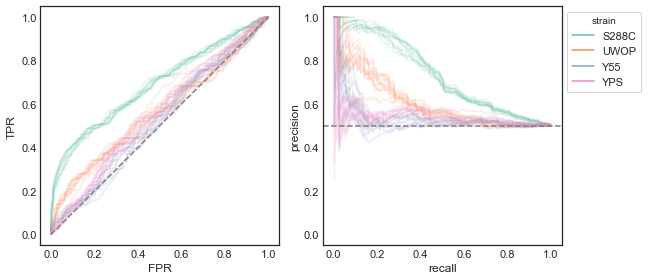

In [14]:
plt.figure(figsize=(8, 4))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

res = []

for s, c in scolor.items():
    b = True
    for fpr, tpr, t1, auc1, prec, rec, t2, auc2 in strain_evaluate('../out/correlations/%s.tsv' % s,
                                                                   '../out/complexes.cyc2008.txt',
                                                                   pairs=False):
        if b:
            b = False
            label = s
        else:
            label = '_'

        ax1.plot(fpr, tpr,
                 '-',
                 alpha=0.15,
                 color=c)

        ax2.plot(rec, prec,
                 '-',
                 alpha=0.15,
                 label=label,
                 color=c)
        
        res.append((s, auc1, auc2))

r = pd.DataFrame(res,
                 columns=['strain', 'rauc', 'prauc'])
        
ax1.plot([0, 1],
         [0, 1],
         '--',
         color='grey')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')

ax2.set_xlabel('recall')
ax2.set_ylabel('precision')
ax2.set_ylim(-.05, 1.05)
ax2.axhline(0.5,
            color='grey',
            linestyle='dashed')
        
leg = plt.legend(loc='upper left',
                 bbox_to_anchor=(1, 1),
                 frameon=True,
                 title='strain')
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.tight_layout();

In [15]:
r.groupby('strain').mean()

,rauc,prauc
strain,,
S288C,0.689033,0.735660
UWOP,0.564159,0.603573
Y55,0.523760,0.536204
YPS,0.548737,0.542879


Kegg modules
---

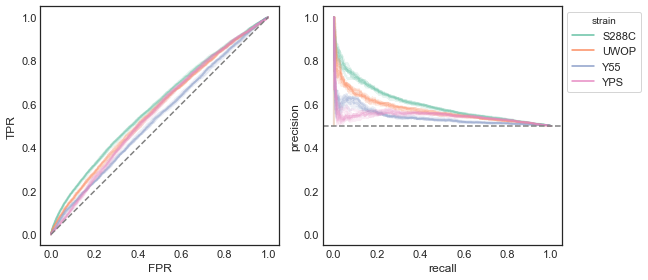

In [16]:
plt.figure(figsize=(8, 4))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

res = []

for s, c in scolor.items():
    b = True
    for fpr, tpr, t1, auc1, prec, rec, t2, auc2 in strain_evaluate('../out/correlations/%s.tsv' % s,
                                                                   '../out/modules.kegg.txt',
                                                                   pairs=False):
        if b:
            b = False
            label = s
        else:
            label = '_'

        ax1.plot(fpr, tpr,
                 '-',
                 alpha=0.15,
                 color=c)

        ax2.plot(rec, prec,
                 '-',
                 alpha=0.15,
                 label=label,
                 color=c)
        
        res.append((s, auc1, auc2))

r = pd.DataFrame(res,
                 columns=['strain', 'rauc', 'prauc'])
        
ax1.plot([0, 1],
         [0, 1],
         '--',
         color='grey')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')

ax2.set_xlabel('recall')
ax2.set_ylabel('precision')
ax2.set_ylim(-.05, 1.05)
ax2.axhline(0.5,
            color='grey',
            linestyle='dashed')
        
leg = plt.legend(loc='upper left',
                 bbox_to_anchor=(1, 1),
                 frameon=True,
                 title='strain')
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.tight_layout();

In [17]:
r.groupby('strain').mean()

,rauc,prauc
strain,,
S288C,0.591673,0.599327
UWOP,0.570680,0.572824
Y55,0.537528,0.539376
YPS,0.562691,0.545155


Biogrid physical interactions
---

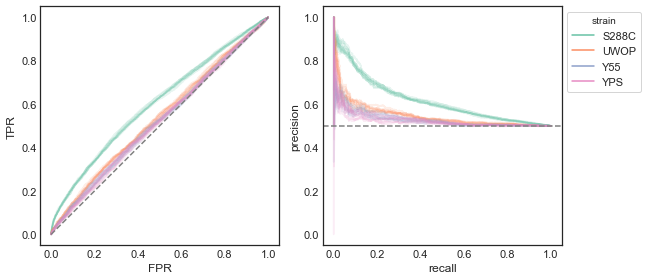

In [19]:
plt.figure(figsize=(8, 4))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

res = []

for s, c in scolor.items():
    b = True
    for fpr, tpr, t1, auc1, prec, rec, t2, auc2 in strain_evaluate('../out/correlations/%s.tsv' % s,
                                                                   '../out/biogrid.physical.txt',
                                                                   pairs=True):
        if b:
            b = False
            label = s
        else:
            label = '_'

        ax1.plot(fpr, tpr,
                 '-',
                 alpha=0.15,
                 color=c)

        ax2.plot(rec, prec,
                 '-',
                 alpha=0.15,
                 label=label,
                 color=c)
        
        res.append((s, auc1, auc2))

r = pd.DataFrame(res,
                 columns=['strain', 'rauc', 'prauc'])
        
ax1.plot([0, 1],
         [0, 1],
         '--',
         color='grey')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')

ax2.set_xlabel('recall')
ax2.set_ylabel('precision')
ax2.set_ylim(-.05, 1.05)
ax2.axhline(0.5,
            color='grey',
            linestyle='dashed')
        
leg = plt.legend(loc='upper left',
                 bbox_to_anchor=(1, 1),
                 frameon=True,
                 title='strain')
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.tight_layout();

In [20]:
r.groupby('strain').mean()

,rauc,prauc
strain,,
S288C,0.601151,0.616217
UWOP,0.535991,0.545757
Y55,0.520313,0.527781
YPS,0.518118,0.524172


<h5><a href="javascript:toggle()" target="_self">toggle source code</a></h5>